<img src="https://github.com/JandreiSS/RNA-Farinha-de-Trigo/blob/master/Farinha%20de%20Trigo.jpg?raw=1" align="center">

# UTILIZAÇÃO DE REDES NEURAIS ARTIFICIAIS PARA CLASSIFICAÇÃO DE FARINHA DE TRIGO EM UMA INDÚSTRIA DE BISCOITOS E MASSAS

### DISSERTAÇÃO DE MESTRADO


## Definição do Problema

Uma indústria de biscoitos e massas realiza a classificação de farinha de trigo para a utilização na sua produção, com base nas análises realizadas em seu laboratório físico-analítico.

### Qual é o problema que queremos resolver?

Realizar a classificação das farinhas para cada produto, retornando se ela está aprovada, aprovada condicional ou reprovada, de uma forma mais eficiente que a atual obtida na empresa.

## Métricas

Afinal, como saberemos que a solução encontrada está funcionando? Mais do que melhorar as técnicas de machine learning, precisamos definir quais serão as métricas de negócio/produto que iremos afetar. É importante escolher dois tipos de métricas:

- Primária
- Secundárias

Essas métricas devem ser usadas para definir o sucesso/fracasso do projeto
durante o teste em produção (por exemplo, teste A/B).

### Métrica Primária

Essa é a métrica principal do projeto, aquela que será medida em todos os estágios possíveis, principalmente durante o monitoramento em produção. No caso deste trabalho, o <b> percentual de classificações corretas de farinha de trigo para cada produto </b> será levada como a principal métrica.
Tudo o que faremos no projeto é voltado a melhorar essa métrica. Mas precisamos tomar cuidado, pois o fato de estarmos tentando afetá-la, a torna menos confiável.
A “Lei de Goodhart” diz: “Quando uma métrica se torna um alvo, ela deixa de ser uma boa métrica”. Por isso precisamos de…

### Métricas Secundárias

Não adianta melhorar o número de classificações corretas se o tempo para obter esse resultado é muito superior ao obtido hoje.
Por isso é importante, na maioria dos projetos de machine learning, ter várias métricas secundárias que tratem de monitorar outros passos e processos afetados por nossa solução.
Nosso objetivo não deve ser otimizar essas métricas diretamente ou tornaremos essas novas métricas primárias.
Devemos monitorar e entender o efeito de nossa solução. Na maioria dos casos o ideal é que essas métricas se mantenham no mesmo nível de antes da solução, pois o mais importante é monitorar a degradação. Se essas métricas secundárias melhorarem, podemos considerar como um bônus.
Não existem métricas secundárias específicas. Elas são qualquer métrica que seja importante para o processo e não seja a primária.
Então, além da nossa métrica primária, podemos ter:

- percentual de farinhas aprovadas
- percentual de farinhas aprovadas condicionalmente
- percentual de farinhas reprovadas
- tempo para obtenção dos resultados
    
## Preparação dos Dados

<p>Os dados para este estudo foram obtidos do banco de dados do ERP da empresa, portanto, os mesmos vieram em sua forma bruta, sem nenhum tipo de tratamento, mas exatamente como são obtidos e utilizados no processo diário de decisão. No quadro abaixo está disposto o <i> data dictionary </i> (do inglês, dicionário de dados), ou seja, indica quais as variáveis disponíveis no banco de dados e suas características.</p>

<table>
    <tr> <th>Variável</th> <th>Descrição</th> <th>Tipo de dado</th> </tr>
    <tr> 
        <td><center>Empresa</center></td>
        <td>Fornecedor da farinha de trigo</td>
        <td>Nome do fornecedor</td> 
    </tr>
    <tr>
        <td><center>Data Fabricação</center></td>
        <td>Data de fabricação da farinha de trigo, pelo fornecedor</td>
        <td>dd/mm/aaaa</td> 
    </tr>
    <tr>
        <td><center>Data Entrada</center></td>
        <td>Data de utilização da farinha no processo produtivo</td>
        <td>dd/mm/aaaa</td> 
    </tr>
    <tr>
        <td><center>UM</center></td>
        <td>Percentual de umidade da farinha de trigo</td>
        <td>%</td> 
    </tr>
    <tr>
        <td><center>P</center></td>
        <td>Tenacidade</td>
        <td>mm</td> 
    </tr>
    <tr>
        <td><center>L</center></td>
        <td>Extensibilidade</td>
        <td>mm</td> 
    </tr>
    <tr>
        <td><center>P/L</center></td>
        <td>Relação tenacidade/extensibilidade</td>
        <td>sem unidade</td> 
    </tr>
    <tr>
        <td><center>W</center></td>
        <td>Força de glúten</td>
        <td>10<sup>-4</sup> J</td> 
    </tr>
    <tr>
        <td><center>Ie</center></td>
        <td>Índice de elasticidade</td>
        <td>%</td> 
    </tr>
    <tr>
        <td><center>FN</center></td>
        <td><i>Falling Number</i> ou número de queda</td>
        <td>s</td> 
    </tr>
    <tr>
        <td><center>GU</center></td>
        <td>Glúten úmido</td>
        <td>g</td> 
    </tr>
    <tr>
        <td><center>GS</center></td>
        <td>Glúten seco</td>
        <td>g</td>
    </tr>
    <tr>
        <td><center>Index</center></td>
        <td>Teor de glúten</td>
        <td>%</td>
    </tr>
    <tr>
        <td><center>Bu</center></td>
        <td>Cinzas em base úmida</td>
        <td>g</td>
    </tr>
    <tr>
        <td><center>Bs</center></td>
        <td>Cinzas em base seca</td>
        <td>g</td>
    </tr>
    <tr>
        <td><center>L*</center></td>
        <td>Luminosidade</td>
        <td>escala de zero (preto) a 100 (branco)</td> 
    </tr>
    <tr>
        <td><center>a*</center></td>
        <td>Coordenada de cromaticidade a*</td>
        <td>varia de a* positivo (tonalidade vermelha)<p>até a* negativo (tonalidade verde)</p></td> 
    </tr>
    <tr>
        <td><center>b*</center></td>
        <td>Coordenada de cromaticidade b*</td>
        <td>varia de b* positivo (tonalidade amarela)<p>até b* negativo (tonalidade azul)</p></td> 
    </tr>
    <tr>
        <td><center>Produto</center></td>
        <td>Tipo do produto</td>
        <td>Nome do produto</td> 
    </tr>
    <tr>
        <td><center>Parecer</center></td>
        <td>Situação de aprovação da farinha de trigo</td>
        <td>Aprovado, Aprovado condicional ou Reprovado</td>
    </tr>
</table>
<p>Quadro 1 - Dicionário de dados do ERP da empresa.</p>
Fonte: Autoria própria, 2020

De acordo com XXX(XXXX), um dos maiores erros que se comete em <i>data science</i> é o de querer que os dados e as variáveis de um banco de dados ditos bruto (bancos de dados que não passaram por nenhum tratamento) estejam da melhor forma para extrair informações, o que leva a erros inesperados gerados por valores que não fazem sentido ou que não conseguem gerar informação útil. Dessa forma, fez-se a análise preliminar das variáveis e seus tipos de dados, indicados no Quadro 1.
As variáveis naturais (do banco de dados original) Data Fabricação e Data Entrada foram transformadas em apenas uma, a variável DU (Dias até a utilização), assim, transformando duas variáveis que seriam difíceis para se trabalhar em uma variável com informação densa, como pode ser observado no Quadro 2.

<table>
    <tr> <th>Variável</th> <th>Descrição</th> <th>Tipo de dado</th> </tr>
    <tr> 
        <td><center>Empresa</center></td>
        <td>Fornecedor da farinha de trigo</td>
        <td>Nome do fornecedor</td> 
    </tr>
    <tr>
        <td><center>DU</center></td>
        <td>Dias entre a fabricação da farinha de trigo <p>e sua utilização no processo produtivo</p></td>
        <td>dias</td> 
    </tr>
    <tr>
        <td><center>UM</center></td>
        <td>Percentual de umidade da farinha de trigo</td>
        <td>%</td> 
    </tr>
    <tr>
        <td><center>P</center></td>
        <td>Tenacidade</td>
        <td>mm</td> 
    </tr>
    <tr>
        <td><center>L</center></td>
        <td>Extensibilidade</td>
        <td>mm</td> 
    </tr>
    <tr>
        <td><center>P/L</center></td>
        <td>Relação tenacidade/extensibilidade</td>
        <td>sem unidade</td> 
    </tr>
    <tr>
        <td><center>W</center></td>
        <td>Força de glúten</td>
        <td>10<sup>-4</sup> J</td> 
    </tr>
    <tr>
        <td><center>Ie</center></td>
        <td>Índice de elasticidade</td>
        <td>%</td> 
    </tr>
    <tr>
        <td><center>FN</center></td>
        <td><i>Falling Number</i> ou número de queda</td>
        <td>s</td> 
    </tr>
    <tr>
        <td><center>GU</center></td>
        <td>Glúten úmido</td>
        <td>g</td> 
    </tr>
    <tr>
        <td><center>GS</center></td>
        <td>Glúten seco</td>
        <td>g</td>
    </tr>
    <tr>
        <td><center>Index</center></td>
        <td>Teor de glúten</td>
        <td>%</td>
    </tr>
    <tr>
        <td><center>Bu</center></td>
        <td>Cinzas em base úmida</td>
        <td>g</td>
    </tr>
    <tr>
        <td><center>Bs</center></td>
        <td>Cinzas em base seca</td>
        <td>g</td>
    </tr>
    <tr>
        <td><center>L*</center></td>
        <td>Luminosidade</td>
        <td>escala de zero (preto) a 100 (branco)</td> 
    </tr>
    <tr>
        <td><center>a*</center></td>
        <td>Coordenada de cromaticidade a*</td>
        <td>varia de a* positivo (tonalidade vermelha)<p>até a* negativo (tonalidade verde)</p></td> 
    </tr>
    <tr>
        <td><center>b*</center></td>
        <td>Coordenada de cromaticidade b*</td>
        <td>varia de b* positivo (tonalidade amarela)<p>até b* negativo (tonalidade azul)</p></td> 
    </tr>
    <tr>
        <td><center>Produto</center></td>
        <td>Tipo do produto</td>
        <td>Nome do produto</td> 
    </tr>
    <tr>
        <td><center>Parecer</center></td>
        <td>Situação de aprovação da farinha de trigo</td>
        <td>Aprovado, Aprovado condicional ou Reprovado</td>
    </tr>
</table>
<p>Quadro 2 - Dicionário de dados pós análise preliminar de variáveis.</p>
Fonte: Autoria própria, 2020

 
### Variable notes

Para a melhor interpretação dos resultados que posteriormente surgirão, as variáveis com que trabalhamos devem ser explicitamente explicadas. Para tal, seguem as notas sobre as variáveis do Quadro 2.

**Empresa:** a variável empresa refere-se aos fornecedores da farinha de trigo, em outras palavras, são as empresas que realizam a transformação do grão do trigo em farinha, cada qual com seus próprios fornecedores de grãos, o que as torna uma variável preliminarmente importante para o nosso estudo, uma vez que trigos produzidos em condições diferentes geram farinhas diferentes.

## Data analisys

### Análise exploratória de dados

#### Importando bibliotecas

Para iniciar a análise, as bibliotecas pandas, seaborn e matplotlib foram importadas

In [60]:
import keras
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

#### Atribuindo o Dataset para um Dataframe

In [61]:
df = pd.read_excel('base_dados_farinha.xlsx')

In [62]:
df.sample(5)

,Empresa,DU,UM (%),P,L,P/L,W,Ie,FN,GU,GS,Index,Bu,Bs,L*,a*,b*,Produto,Parecer
742,REGIO,0,13.2,127.0,49.0,2.59,250.0,54.8,270.0,28.15,9.40,96.10,0.36,0.41,92.07,-0.30,10.94,MASSA INTEIRA,Ap. Condicional
926,TRADIÇÃO,0,12.7,76.0,80.0,0.95,219.0,58.4,337.0,25.35,8.90,98.25,0.55,0.63,91.35,-0.22,11.60,BISCOITO SALGADO,Ap. Condicional
4850,MOCCA,4,13.1,68.0,97.0,0.70,192.0,48.6,262.0,33.00,10.95,98.15,1.01,1.16,89.49,0.68,10.64,BISCOITO,Ap. Condicional
4713,MOCCA,4,13.6,106.0,68.0,1.56,275.0,59.6,330.0,32.10,10.70,90.50,0.57,0.67,91.33,-0.25,11.64,MASSA COMUM,Aprovado
5839,FILADELFIA,8,14.0,101.0,69.0,1.46,232.0,47.7,324.0,29.20,9.50,97.30,0.80,0.93,89.45,0.34,12.08,BISCOITO,Aprovado


#### Verificação de colunas e tipos de dados

Para iniciar as análises, é necessário que a biblioteca pandas tenha entendido todos os dados tais quais eles são, ou seja, numéricos, que se dividem em inteiros (int64) e de ponto flutuante (float64), ou <i>strings</i> (object).

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6644 entries, 0 to 6643
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Empresa  6644 non-null   object 
 1   DU       6644 non-null   int64  
 2   UM (%)   6644 non-null   float64
 3   P        6644 non-null   float64
 4   L        6644 non-null   float64
 5   P/L      6644 non-null   float64
 6   W        6644 non-null   float64
 7   Ie       6644 non-null   float64
 8   FN       6644 non-null   float64
 9   GU       6644 non-null   float64
 10  GS       6644 non-null   float64
 11  Index    6644 non-null   float64
 12  Bu       6644 non-null   float64
 13  Bs       6644 non-null   float64
 14  L*       6644 non-null   float64
 15  a*       6644 non-null   float64
 16  b*       6644 non-null   float64
 17  Produto  6644 non-null   object 
 18  Parecer  6644 non-null   object 
dtypes: float64(15), int64(1), object(3)
memory usage: 986.3+ KB


In [64]:
df.describe()

,DU,UM (%),P,L,P/L,W,Ie,FN,GU,GS,Index,Bu,Bs,L*,a*,b*
count,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.00000,6644.000000,6644.000000,6644.000000
mean,4.034317,13.449944,112.731475,69.395948,1.966612,260.524132,50.661645,318.810738,27.747228,9.459468,93.466837,0.689959,0.71893,91.390709,-0.041943,10.955793
std,8.238962,0.837526,29.527988,21.153704,5.275270,75.505546,18.266299,57.704422,5.195007,2.795201,15.559723,2.637186,1.74849,2.970869,0.472807,1.536520
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.39000,0.000000,-1.910000,0.000000
25%,1.000000,13.100000,92.000000,54.000000,1.140000,222.000000,47.700000,292.000000,26.400000,9.000000,94.900000,0.440000,0.51000,90.140000,-0.380000,10.540000
50%,2.000000,13.500000,116.000000,68.000000,1.710000,262.000000,52.300000,320.000000,28.300000,9.550000,97.200000,0.560000,0.65000,91.650000,-0.080000,10.950000
75%,4.000000,13.900000,133.000000,81.000000,2.410000,301.000000,55.800000,346.000000,30.100000,10.150000,98.300000,0.720000,0.82000,92.642500,0.310000,11.350000
max,303.000000,15.800000,453.000000,501.000000,305.000000,3214.000000,556.000000,878.000000,96.200000,94.000000,99.900000,98.000000,87.00000,97.870000,3.490000,90.280000


Com o intuito de analisar a interdependência das variáveis, para mensurar a correlação entre as mesmas, procurou-se calcular e apresentar um mapa de calor. Dentre as correlações encontradas, a mais forte ocorreu de forma inversamente proporcional a nível moderado, entre P e L, sendo que todas as demais estão a níveis desprezíveis, interpretando os valores através da correlação de Pearson.

In [65]:
df.corr().style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,DU,UM (%),P,L,P/L,W,Ie,FN,GU,GS,Index,Bu,Bs,L*,a*,b*
DU,1.0,-0.061,0.0064,-0.00036,-0.0031,0.018,-0.036,0.00028,-0.013,-0.015,-0.052,0.0043,0.0067,-0.046,0.071,-0.025
UM (%),-0.061,1.0,0.15,-0.015,0.026,0.14,0.095,0.15,-0.0028,0.0037,0.09,-0.024,-0.028,0.12,-0.21,-0.043
P,0.0064,0.15,1.0,-0.61,0.15,0.54,0.035,0.17,-0.15,-0.067,0.031,-0.0025,-0.029,0.18,-0.19,-0.091
L,-0.00036,-0.015,-0.61,1.0,-0.17,-0.057,0.14,-0.085,0.31,0.18,0.054,0.002,0.014,-0.078,0.12,-0.0091
P/L,-0.0031,0.026,0.15,-0.17,1.0,0.014,0.12,-0.023,-0.052,-0.031,0.00029,-0.0013,-0.0032,0.025,-0.029,-0.021
W,0.018,0.14,0.54,-0.057,0.014,1.0,0.22,0.17,0.083,0.081,0.11,-0.0012,-0.028,0.14,-0.15,-0.053
Ie,-0.036,0.095,0.035,0.14,0.12,0.22,1.0,0.08,0.096,0.067,0.1,-0.0033,-0.013,0.084,-0.14,-0.035
FN,0.00028,0.15,0.17,-0.085,-0.023,0.17,0.08,1.0,0.061,0.051,0.19,-0.025,-0.022,0.15,-0.25,0.16
GU,-0.013,-0.0028,-0.15,0.31,-0.052,0.083,0.096,0.061,1.0,0.57,0.73,0.0043,0.013,-0.042,0.075,0.05
GS,-0.015,0.0037,-0.067,0.18,-0.031,0.081,0.067,0.051,0.57,1.0,0.48,0.0019,0.0047,-0.031,0.051,0.035


In [66]:
# corr = df.corr()
# sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

## Analisando produtos

In [67]:
df.groupby('Produto')['Produto'].count().sort_values(ascending=False)

Produto
BISCOITO            2353
MASSA ESPECIAL      1429
MASSA INTEIRA       1406
MASSA COMUM          760
BISCOITO SALGADO     288
MASSA INTEIRA A      165
WAFER                142
BISCOITO DOCE         53
MASSA INTEGRAL        23
GRANODURO             17
BISCOITO CRACKER       8
Name: Produto, dtype: int64

In [68]:
df.groupby('Produto')['Parecer'].value_counts()

Produto           Parecer        
BISCOITO          Aprovado           1527
                  Ap. Condicional     762
                  Reprovado            64
BISCOITO CRACKER  Aprovado              5
                  Ap. Condicional       3
BISCOITO DOCE     Aprovado             40
                  Ap. Condicional      13
BISCOITO SALGADO  Aprovado            262
                  Ap. Condicional      24
                  Reprovado             2
GRANODURO         Aprovado             17
MASSA COMUM       Aprovado            594
                  Ap. Condicional     161
                  Reprovado             5
MASSA ESPECIAL    Aprovado           1071
                  Ap. Condicional     331
                  Reprovado            27
MASSA INTEGRAL    Aprovado             23
MASSA INTEIRA     Aprovado           1185
                  Ap. Condicional     207
                  Reprovado            14
MASSA INTEIRA A   Aprovado            110
                  Ap. Condicional      53


Analisando o resultado da análise exploratória sobre os tipos de produtos que teremos maior confiabilidade pela Rede Neural, Podemos verificar que a quantidade de dados não é suficiente para realizar uma classificação profunda, uma vez que produtos como GRANODURO e MASSA INTEGRAL temos apenas dados de testes aprovados, bem como o BISCOITO CRACKER e BISCOITO DOCE onde não temos resultados reprovados.

Portanto, o caminho será realizar a classificação pelo tipo de produto, ficando os grupos BISCOITO e MASSA.

In [69]:
df['Produto'] = df['Produto'].replace(['BISCOITO CRACKER', 'BISCOITO DOCE', 'BISCOITO SALGADO', 'WAFER'], 'BISCOITO')


In [70]:
df['Produto'] = df['Produto'].replace(['GRANODURO', 'MASSA COMUM', 'MASSA ESPECIAL', 'MASSA INTEGRAL', 'MASSA INTEIRA', 'MASSA INTEIRA A'], 'MASSA')

In [71]:
df.sample(20)

,Empresa,DU,UM (%),P,L,P/L,W,Ie,FN,GU,GS,Index,Bu,Bs,L*,a*,b*,Produto,Parecer
2612,SPECHT,1,12.9,100.0,66.0,1.52,251.0,57.5,319.0,27.10,9.10,98.70,0.39,0.44,93.35,-0.53,10.26,MASSA,Aprovado
4266,MOCCA,3,13.3,115.0,89.0,1.29,356.0,60.0,372.0,32.20,10.80,94.70,0.41,0.47,93.12,-0.51,10.95,MASSA,Aprovado
1902,COOPAVEL,1,13.5,59.0,97.0,0.61,152.0,42.5,294.0,29.10,9.85,98.60,0.73,0.84,90.75,0.11,11.26,BISCOITO,Aprovado
1161,COOPAVEL,1,14.2,135.0,51.0,2.65,269.0,52.5,364.0,25.65,8.60,96.85,0.54,0.62,92.17,-0.08,10.72,MASSA,Aprovado
3910,BATAVO (FRISIA),3,14.1,104.0,63.0,1.65,248.0,57.0,295.0,25.50,8.55,98.25,0.41,0.47,93.73,-0.51,9.33,MASSA,Aprovado
4586,TRADIÇÃO,4,14.0,151.0,52.0,2.90,313.0,56.0,309.0,27.10,9.20,98.05,0.59,0.68,92.08,0.07,10.78,MASSA,Aprovado
1426,COOPAVEL,1,13.9,150.0,51.0,2.94,295.0,50.9,348.0,24.35,8.35,98.15,0.66,0.76,91.05,0.16,10.63,MASSA,Aprovado
4584,FILADELFIA,4,14.0,78.0,83.0,0.94,197.0,47.3,306.0,29.00,9.80,98.50,0.78,0.90,90.22,0.30,11.09,BISCOITO,Aprovado
6421,TRADIÇÃO,17,13.5,160.0,48.0,3.33,311.0,54.7,363.0,27.50,9.35,98.75,0.67,0.77,91.06,0.24,10.89,MASSA,Aprovado
2880,MOINHO RIQUEZA - SOMOR,2,14.5,102.0,74.0,1.38,246.0,49.2,350.0,25.84,8.65,88.50,0.47,0.54,92.41,-0.17,10.62,MASSA,Aprovado


## Analisando empresas

In [72]:
dados = df.groupby('Empresa')['Parecer'].value_counts()

In [73]:
# df.groupby('Empresa')['Parecer'].value_counts().plot.bar()

In [74]:
dados.filter(like='Aprovado', axis=0).sort_values(ascending=False)

Empresa                 Parecer 
MOCCA                   Aprovado    1115
COOPAVEL                Aprovado    1079
TRADIÇÃO                Aprovado     784
INFASA                  Aprovado     477
FILADELFIA              Aprovado     256
COTRICAMPO              Aprovado     222
AGRÁRIA                 Aprovado     174
COAMO                   Aprovado     100
ITAIPU                  Aprovado      97
ALFA                    Aprovado      83
REGIO                   Aprovado      71
NORDESTE                Aprovado      67
BATAVO (FRISIA)         Aprovado      63
CAPICI                  Aprovado      48
CONSOLATA               Aprovado      40
SPECHT                  Aprovado      30
RIO AZUL (REFARE)       Aprovado      29
CIDADE BELLA            Aprovado      25
MOINHO RIQUEZA - SOMOR  Aprovado      24
BUNGE                   Aprovado      22
COOPAVEL (HILÉIA)       Aprovado      21
AURI VERDE - REALTA     Aprovado      21
MISSIONEIRO             Aprovado      17
COOPER ITAIPU           

In [75]:
dados.filter(like='Ap. Condicional', axis=0).sort_values(ascending=False)

Empresa            Parecer        
COOPAVEL           Ap. Condicional    399
MOCCA              Ap. Condicional    393
FILADELFIA         Ap. Condicional    159
ITAIPU             Ap. Condicional    151
TRADIÇÃO           Ap. Condicional     91
INFASA             Ap. Condicional     91
REGIO              Ap. Condicional     67
ALFA               Ap. Condicional     48
CONSOLATA          Ap. Condicional     45
BATAVO (FRISIA)    Ap. Condicional     38
DONA ALDA          Ap. Condicional     35
RIO AZUL (REFARE)  Ap. Condicional     16
COAMO              Ap. Condicional     15
SPECHT             Ap. Condicional     12
MISSIONEIRO        Ap. Condicional     11
ROTTA              Ap. Condicional      4
RIQUEZA            Ap. Condicional      3
COTRIGUAÇU         Ap. Condicional      3
NORDESTE           Ap. Condicional      2
COTRICAMPO         Ap. Condicional      2
CAMPEA             Ap. Condicional      1
Name: Parecer, dtype: int64

In [76]:
dados.filter(like='Reprovado', axis=0).sort_values(ascending=False)

Empresa            Parecer  
MOCCA              Reprovado    46
COOPAVEL           Reprovado    16
FILADELFIA         Reprovado    15
ITAIPU             Reprovado     8
INFASA             Reprovado     6
REGIO              Reprovado     5
DONA ALDA          Reprovado     4
ALFA               Reprovado     3
RIO AZUL (REFARE)  Reprovado     2
MISSIONEIRO        Reprovado     2
COTRICAMPO         Reprovado     2
CONSOLATA          Reprovado     2
BATAVO (FRISIA)    Reprovado     2
TRADIÇÃO           Reprovado     1
MOINHO TRES        Reprovado     1
Name: Parecer, dtype: int64

## Desenvolvimento da Rede Neural Artificial

A primeira coisa que precisamos fazer é separar os previsores das classes que temos. Para isso, vamos criar dois dataframes.

In [77]:
previsores = df.iloc[:, 0:17].values
previsores

array([['REGIO', 0, 14.9, ..., 92.51, -0.24, 10.22],
       ['COOPAVEL', 0, 14.8, ..., 90.35, 0.21, 11.94],
       ['COOPAVEL', 0, 14.7, ..., 89.74, 0.31, 11.32],
       ...,
       ['MOCCA', 123, 13.2, ..., 91.43, -0.25, 11.5],
       ['NORDESTE', 228, 13.6, ..., 93.54, -0.51, 10.03],
       ['REGIO', 303, 13.3, ..., 92.82, -0.61, 11.41]], dtype=object)

In [78]:
classes = df.iloc[:, 17:19].values
classes

array([['MASSA', 'Ap. Condicional'],
       ['BISCOITO', 'Reprovado'],
       ['BISCOITO', 'Ap. Condicional'],
       ...,
       ['MASSA', 'Aprovado'],
       ['MASSA', 'Aprovado'],
       ['MASSA', 'Ap. Condicional']], dtype=object)

## Pré-processamento dos Dados

Conforme análise dos tipos de variáveis, podemos ver que a empresa, o produto e o parecer são <i>strings</i>, que precisamos alterar para valores numéricos, a fim de utilizar matemática para interpretação dos dados. Para isso, fazemos a transformação desse tipo de variável para Dummy.

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
labelencoder = LabelEncoder()

In [81]:
classes = pd.DataFrame(classes)

In [82]:
classes

,0,1
0,MASSA,Ap. Condicional
1,BISCOITO,Reprovado
2,BISCOITO,Ap. Condicional
3,BISCOITO,Ap. Condicional
4,MASSA,Reprovado
...,...,...
6639,BISCOITO,Aprovado
6640,MASSA,Aprovado
6641,MASSA,Aprovado
6642,MASSA,Aprovado


In [83]:
for coluna in range(2):
    classes[coluna] = labelencoder.fit_transform(classes[coluna])

In [84]:
classes

,0,1
0,1,0
1,0,2
2,0,0
3,0,0
4,1,2
...,...,...
6639,0,1
6640,1,1
6641,1,1
6642,1,1


In [85]:
classe_prod = pd.DataFrame(classes[0])
# classe_prod.to_excel(r'C:\Users\Jandrei\Desktop\Classe_Prod.xlsx', index = True)

Agora que fizemos a transformação de texto para número, temos que tratar de transformar em variável Dummy. Sabemos que, dentre as classes, temos que Produtos é dado por 1 Massa e 0 Biscoito, enquanto Parecer é 0 para Aprovado Condicional, 1 para Aprovado e 2 para Reprovado.

Antes de transformar para Dummy, vamos transformar a variável Empresa dos previsores, uma vez que também é string.

In [86]:
previsores = pd.DataFrame(previsores)

In [87]:
previsores

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,REGIO,0,14.9,133,45,2.96,244,51.9,301,24.15,8.4,98.9,0.39,0.45,92.51,-0.24,10.22
1,COOPAVEL,0,14.8,69,115,0.6,216,48.8,292,0,0,0,0,0,90.35,0.21,11.94
2,COOPAVEL,0,14.7,96,71,1.35,233,51,271,30.3,10.25,98.15,0.79,0.92,89.74,0.31,11.32
3,MOCCA,0,14.7,92,83,1.11,216,42.9,302,27.3,9.4,98.4,0.61,0.71,89.82,0.27,11.37
4,COOPAVEL,0,14.7,131,60,2.18,291,53.4,329,29.7,10.1,97.3,0.52,0.6,91.41,-0.18,11.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,INFASA,91,13.3,78,71,1.1,190,51.4,332,27.1,9.3,98.75,0.76,0.87,90.07,0.31,10.78
6640,MOCCA,113,13.7,127,80,1.59,348,56,248,28.15,9.35,94.75,0.49,0.56,92.55,-0.32,10.01
6641,MOCCA,123,13.2,119,61,1.95,290,61.5,328,31.5,10.5,97.1,0.56,0.64,91.43,-0.25,11.5
6642,NORDESTE,228,13.6,121,37,3.27,186,0,320,25.6,8.8,98.5,0.44,0.5,93.54,-0.51,10.03


In [88]:
previsores[0] = labelencoder.fit_transform(previsores[0])

In [89]:
previsores

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,31,0,14.9,133,45,2.96,244,51.9,301,24.15,8.4,98.9,0.39,0.45,92.51,-0.24,10.22
1,11,0,14.8,69,115,0.6,216,48.8,292,0,0,0,0,0,90.35,0.21,11.94
2,11,0,14.7,96,71,1.35,233,51,271,30.3,10.25,98.15,0.79,0.92,89.74,0.31,11.32
3,25,0,14.7,92,83,1.11,216,42.9,302,27.3,9.4,98.4,0.61,0.71,89.82,0.27,11.37
4,11,0,14.7,131,60,2.18,291,53.4,329,29.7,10.1,97.3,0.52,0.6,91.41,-0.18,11.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,20,91,13.3,78,71,1.1,190,51.4,332,27.1,9.3,98.75,0.76,0.87,90.07,0.31,10.78
6640,25,113,13.7,127,80,1.59,348,56,248,28.15,9.35,94.75,0.49,0.56,92.55,-0.32,10.01
6641,25,123,13.2,119,61,1.95,290,61.5,328,31.5,10.5,97.1,0.56,0.64,91.43,-0.25,11.5
6642,29,228,13.6,121,37,3.27,186,0,320,25.6,8.8,98.5,0.44,0.5,93.54,-0.51,10.03


### Transformar classes em Dummy

In [90]:
from keras.utils import np_utils

In [91]:
# classe_dummy_prod = np_utils.to_categorical(classes[0])
# classe_dummy_prod = pd.DataFrame(classe_dummy_prod)
# classe_dummy_prod

In [92]:
classe_dummy_parecer = np_utils.to_categorical(classes[1])
classe_dummy_parecer = pd.DataFrame(classe_dummy_parecer)
classe_dummy_parecer

,0,1,2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
6639,0.0,1.0,0.0
6640,0.0,1.0,0.0
6641,0.0,1.0,0.0
6642,0.0,1.0,0.0


#### Tratando dados dos previsores

In [93]:
previsores_dummy_empresas = np_utils.to_categorical(previsores[0])
previsores_dummy_empresas = pd.DataFrame(previsores_dummy_empresas)
previsores_dummy_empresas

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
previsores_aux = pd.DataFrame(previsores_dummy_empresas)
previsores_aux[38] = previsores[1]
previsores_aux[39] = previsores[2]
previsores_aux[40] = previsores[3]
previsores_aux[41] = previsores[4]
previsores_aux[42] = previsores[5]
previsores_aux[43] = previsores[6]
previsores_aux[44] = previsores[7]
previsores_aux[45] = previsores[8]
previsores_aux[46] = previsores[9]
previsores_aux[47] = previsores[10]
previsores_aux[48] = previsores[11]
previsores_aux[49] = previsores[12]
previsores_aux[50] = previsores[13]
previsores_aux[51] = previsores[14]
previsores_aux[52] = previsores[15]
previsores_aux[53] = previsores[16]

In [95]:
previsores = previsores_aux
previsores

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14.9,133,45,2.96,244,51.9,301,24.15,8.4,98.9,0.39,0.45,92.51,-0.24,10.22
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14.8,69,115,0.6,216,48.8,292,0,0,0,0,0,90.35,0.21,11.94
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14.7,96,71,1.35,233,51,271,30.3,10.25,98.15,0.79,0.92,89.74,0.31,11.32
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14.7,92,83,1.11,216,42.9,302,27.3,9.4,98.4,0.61,0.71,89.82,0.27,11.37
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14.7,131,60,2.18,291,53.4,329,29.7,10.1,97.3,0.52,0.6,91.41,-0.18,11.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91,13.3,78,71,1.1,190,51.4,332,27.1,9.3,98.75,0.76,0.87,90.07,0.31,10.78
6640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113,13.7,127,80,1.59,348,56,248,28.15,9.35,94.75,0.49,0.56,92.55,-0.32,10.01
6641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123,13.2,119,61,1.95,290,61.5,328,31.5,10.5,97.1,0.56,0.64,91.43,-0.25,11.5
6642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228,13.6,121,37,3.27,186,0,320,25.6,8.8,98.5,0.44,0.5,93.54,-0.51,10.03


Agora, vamos fazer a divisão da base de dados entre treinamento de teste. A primeira RNA que faremos é para classificar entre Biscoito e Massa, ou seja, será uma RNA de classificação binária.

## Tuning de Parâmetros para a Estrutura da Rede Neural Artificial

Com o intuito de buscar os melhores resultados para a RNA, os pesquisadores buscaram realizar testes variando diversos parâmetros, como o otimizador da rede, a função de perda, o tipo de inicialização dos dados dos neurônios, a função de ativação, o número de neurônios na camada oculta e o percentual de dropout.


In [96]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [97]:
def criarRede(optimizer, loss, kernel_initializer, activation, dropout, neurons):
  classificador = Sequential()
  classificador.add(Dense(input_dim = 54, units = neurons,
                          activation = activation, 
                          kernel_initializer = kernel_initializer))
  classificador.add(Dropout(dropout))
  classificador.add(Dense(units = 1, activation = 'sigmoid'))
  classificador.compile(optimizer = optimizer, loss = loss, metrics = ['binary_accuracy'])

In [98]:
classificador = KerasClassifier(build_fn = criarRede)

In [99]:
parametros = {'batch_size': [10, 30],
              'epochs': [100, 300, 500],
              'optimizer': ['adam', 'adagrad', 'adamax'],
              'kernel_initializer': ['random_uniform', 'normal'],
              'activation': ['relu', 'sigmoid', 'softmax', 'softplus', 
                             'softsign', 'tanh', 'selu', 'elu', 'exponential'],
              'neurons': [7, 14, 28, 56],
              'loss': ['binary_crossentropy', 'poisson', 'kl_divergence'],
              'dropout': [0.2, 0.3]}

In [100]:
grid_search = GridSearchCV(estimator = classificador,
                           param_grid = parametros,
                           scoring = 'accuracy',
                           cv = 10)

In [101]:
classe_tipo = classes[0]

In [ ]:
grid_search = grid_search.fit(previsores, classe_tipo)
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_

In [1]:
melhores_parametros

NameError: ignored

Com os dados dos parametros encontrados pelo teste de grade, podemos criar a nossa RNA

## Estrutura da Rede Neural Artificial

Para fazer a estrutura, vamos fazer mais algumas importações, sendo elas do modelo da RNA, que será Sequencial, uma camada após a outra, e o tipo de conexão das camadas, que no caso será Densa (ideia trazida pelo Fully Connected)

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense

A partir de agora nós vamos fazer a construção da estrutura da RNA. Primeiro, vamos inicializá-la, com o nome de classificador, sendo que deve-se atribuir a essa variável a função Sequential() importada anteriormente.

In [ ]:
# classificador = Sequential()

A partir de agora, começaremos a criar as camadas da nossa Rede Neural Artificial. São diversos os atributos que podem ser modificados para contruir a rede. Para a primeira camada oculta, trabalharemos primeiramente com quantidade de neurônios, sendo um dos métodos para calcular a quantidade de neurônios nessa camada, podemos utilizar da seguinte fórmula:

$$
    Q_N = (Q_e + Q_s) / 2
$$

Qn quantidade de neurônios, Qe quantidade de entradas e Qs quantidade de saídas. Caso o resultado da divisão não dê inteiro, deve-se arredondar para cima. Nesse caso, temos o total de 17 entradas e 6 saídas, sendo as saídas as combinações entre tipos de produto (2) e parecer (3).

$$
    Q_N = (54 + 2) / 2
$$
$$
    Q_N = 28
$$

Outro dado importante é o do tipo de ativação. Nesse caso, vamos utilizar a RELU. Por fim, a primeira camada oculta deve possuir a informação de quantos são os atributos previsores, que no nosso caso, são 54.
Vamos trabalhar com duas camadas escondidas, sendo a segunda igual a primeira, porém não precisamos passar o input_dim.
Ainda, temos que adicionar a camada de saída.

Agora, faremos a compilação da rede, passando qual otimizador desejamos utilizar (adam), a loss function (categorical_crossentropy) e por fim a propriedade metrics (as métricas), de como faremos a avaliação desse algoritmo (categorical_accuracy)

In [ ]:
# classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy', 'mean_squared_error'])

A partir daqui, a rede já está criada. Vamos então para a parte do treinamento.

In [ ]:
!pip install livelossplot --quiet
from livelossplot import PlotLossesKeras

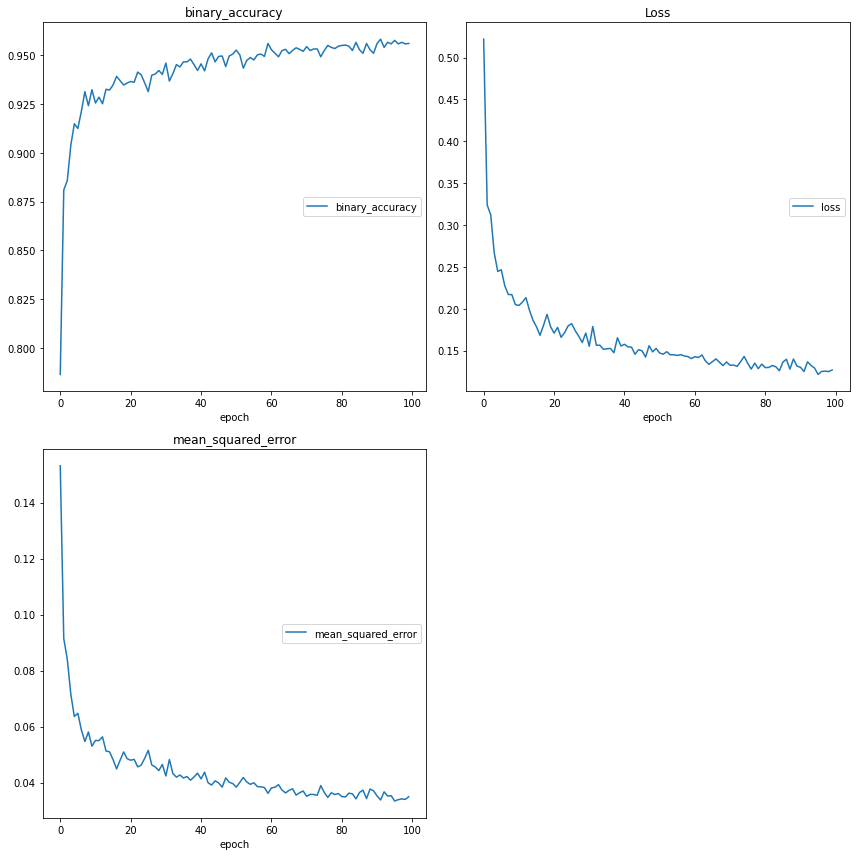

binary_accuracy
	binary_accuracy  	 (min:    0.786, max:    0.958, cur:    0.956)
Loss
	loss             	 (min:    0.121, max:    0.522, cur:    0.127)
mean_squared_error
	mean_squared_error 	 (min:    0.033, max:    0.153, cur:    0.035)


In [ ]:
classificador.fit(previsores_treinamento_prod, classe_treinamento_prod, batch_size = 10, epochs = 100, callbacks = [PlotLossesKeras()], verbose = 0)

### Avaliação da RNA

Para obter as informações de resultado do nosso classificador, utiliza-se o método evaluate, passando como parâmetro os previsores e a classe de teste, avaliando qual o resultado obtido com a base de dados que nosso classificador não conhece.

In [ ]:
previsoes_prod = classificador.predict(previsores_teste_prod)

In [ ]:
previsoes_prod = pd.DataFrame(previsoes_prod)
previsoes_prod

,0
0,0.035410
1,0.004598
2,0.018424
3,0.041783
4,0.993832
...,...
1656,0.022271
1657,0.999402
1658,0.999998
1659,0.059198


In [ ]:
previsoes_prod = previsoes_prod > 0.5
previsoes_prod

,0
0,False
1,False
2,False
3,False
4,True
...,...
1656,False
1657,True
1658,True
1659,False


In [ ]:
classe_teste_prod = pd.DataFrame(classe_teste_prod)
classe_teste_prod

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
1656,0.0
1657,1.0
1658,1.0
1659,0.0


Agora, temos os dados da previsão, no caso, se é biscoito ou massa, para podermos comparar com o que realmente eles são, através da nossa classe de teste de produto.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
precisao_prod = accuracy_score(classe_teste_prod, previsoes_prod)
precisao_prod

0.9482239614689946

In [ ]:
matriz_prod = confusion_matrix(classe_teste_prod, previsoes_prod)
matriz_prod = pd.DataFrame(matriz_prod)
matriz_prod

,0,1
0,669,62
1,24,906


In [ ]:
resultado = classificador.evaluate(previsores_teste_prod, classe_teste_prod)

52/52 [==============================] - 0s 899us/step - loss: 0.1385 - binary_accuracy: 0.9482 - mean_squared_error: 0.0398


In [ ]:
resultado

[0.13848255574703217, 0.9482239484786987, 0.0398428700864315]

Nessa variável resultado, temos a resposta da Loss Function, Binary Accuracy e Mean Square Error da base de teste (submetemos os dados da base de teste à RNA e obtivemos esses resultados)

## Visualização dos Pesos

